### Deep Learning based Time Series Clustering Algorithms

Deep Learning based clustering algorithms for time series are those where $k$
clusters are created from $n$ time series. The aim is to cluster so that each time
series in a cluster are homogenous (similar) to each other and heterogeneous
(dissimilar) to those outside the cluster.

Various Deep Learning based Auto-Encoders help in building a low rank representation
of the time series, also know as, the latent space or feature extraction. Traditional
time series clustering algorithms like `KMeans`, `KNN` etc present in `aeon` are
trained on the latent space to get clusters.


### Contents

- AEBiGRUClusterer : Auto-Encoder based on Bidirectional Gated Recurrent Units (BiGRUs)  

In [39]:
# Import necessary libraries
from aeon.clustering.deep_learning import AEBiGRUClusterer
from aeon.datasets import load_unit_test
from aeon.utils.validation._dependencies import _check_soft_dependencies
from aeon.visualisation import plot_cluster_algorithm

if _check_soft_dependencies(["matplotlib"]):
    import matplotlib.pyplot as plt

In [40]:
# Load the dataset to be clustered
X_train, y_train = load_unit_test(split="train")
(
    X_test,
    y_test,
) = load_unit_test(split="test")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20, 1, 24) (20,) (22, 1, 24) (22,)


In [41]:
# Define the clusterer with 2 clusters, KMeans algorithm for the latent space
# and train it for 2000 epoch
aebgru_clusterer = AEBiGRUClusterer(
    n_clusters=2, clustering_algorithm="kmeans", n_epochs=2000, verbose=False
)

In [42]:
# Fit the clusterer
aebgru_clusterer.fit(X_train)

1/1 [==============================] - 1s 1s/step


AEBiGRUClusterer(n_clusters=2)

In [43]:
# Calculate Score
aebgru_clusterer.score(X_train)

1/1 [==============================] - 0s 47ms/step


-32391.33657953143

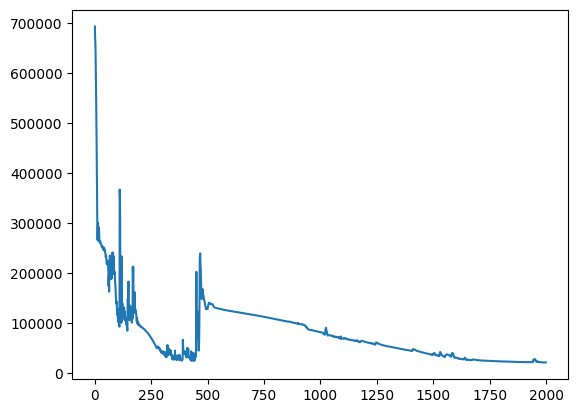

In [44]:
# Plot history for epochs

history = aebgru_clusterer.summary()

if _check_soft_dependencies(["matplotlib"]):
    plt.plot(history["loss"])

1/1 [==============================] - 0s 62ms/step


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

<Figure size 500x1000 with 0 Axes>

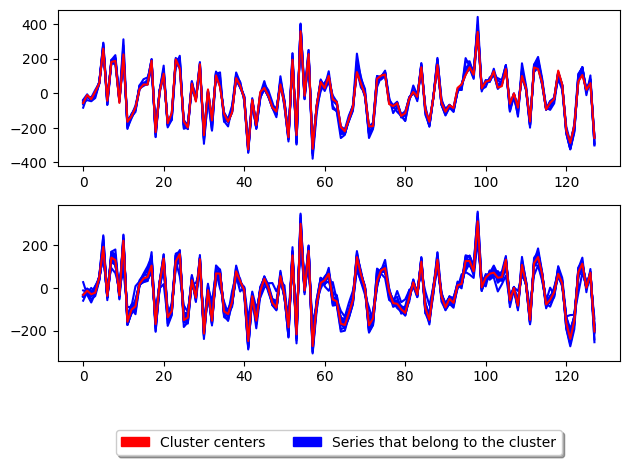

In [45]:
# Visualize the Algorithm
_X_test = X_test.transpose(0, 2, 1)
_latent_space = aebgru_clusterer.model_.layers[1].predict(_X_test)
plot_cluster_algorithm(
    aebgru_clusterer.clusterer, _latent_space, aebgru_clusterer.n_clusters
)